In [1]:
print("hello world!")

hello world!


In [1]:
%pip install kagglehub pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import matplotlib as plt
import os

# Download latest version
path = kagglehub.dataset_download("amritpal333/crypto-mining-data")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████| 743k/743k [00:00<00:00, 89.3MB/s]

Extracting files...
Path to dataset files: /home/runner/.cache/kagglehub/datasets/amritpal333/crypto-mining-data/versions/5


In [28]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/runner/.cache/kagglehub/datasets/amritpal333/crypto-mining-data/versions/5/bitcoin.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3605 non-null   object 
 1   txVolume(USD)          2035 non-null   float64
 2   adjustedTxVolume(USD)  2035 non-null   float64
 3   txCount                3605 non-null   int64  
 4   marketcap(USD)         2035 non-null   float64
 5   price(USD)             2035 non-null   float64
 6   exchangeVolume(USD)    2035 non-null   float64
 7   generatedCoins         3605 non-null   float64
 8   fees                   3605 non-null   float64
 9   activeAddresses        3605 non-null   int64  
 10  averageDifficulty      3605 non-null   float64
 11  paymentCount           3351 non-null   float64
 12  medianTxValue(USD)     2035 non-null   float64
 13  medianFee              3351 non-null   float64
 14  blockSize              3605 non-null   int64  
 15  bloc

In [5]:
df.drop(['txVolume(USD)', 'adjustedTxVolume(USD)', 'txCount', 'marketcap(USD)', 'exchangeVolume(USD)', 'generatedCoins', 'paymentCount', 'medianTxValue(USD)', 'blockSize', 'blockCount'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3605 non-null   object 
 1   price(USD)         2035 non-null   float64
 2   fees               3605 non-null   float64
 3   activeAddresses    3605 non-null   int64  
 4   averageDifficulty  3605 non-null   float64
 5   medianFee          3351 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 169.1+ KB


In [9]:
df = df.dropna(how='any',axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 1570 to 3604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2035 non-null   object 
 1   price(USD)         2035 non-null   float64
 2   fees               2035 non-null   float64
 3   activeAddresses    2035 non-null   int64  
 4   averageDifficulty  2035 non-null   float64
 5   medianFee          2035 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 111.3+ KB


In [11]:
df.head()

,date,price(USD),fees,activeAddresses,averageDifficulty,medianFee
1570,2013-04-28,135.30,32.791942,117984,8.974296e+06,0.0005
1571,2013-04-29,134.44,45.724114,86925,8.974296e+06,0.0005
1572,2013-04-30,144.00,45.748651,76871,9.854414e+06,0.0005
1573,2013-05-01,139.00,40.885938,83564,1.007629e+07,0.0005
1574,2013-05-02,116.38,52.554004,81920,1.007629e+07,0.0005


In [12]:
df['averageDifficulty'] = df['averageDifficulty'].astype('int64')

In [13]:
df.head()

,date,price(USD),fees,activeAddresses,averageDifficulty,medianFee
1570,2013-04-28,135.30,32.791942,117984,8974296,0.0005
1571,2013-04-29,134.44,45.724114,86925,8974296,0.0005
1572,2013-04-30,144.00,45.748651,76871,9854414,0.0005
1573,2013-05-01,139.00,40.885938,83564,10076292,0.0005
1574,2013-05-02,116.38,52.554004,81920,10076292,0.0005


In [14]:
df["price(USD)"].mean()

np.float64(2279.3308648648645)

In [15]:
df["price(USD)"].median()

np.float64(596.33)

In [17]:
df[["price(USD)", "fees", "medianFee", "activeAddresses", "averageDifficulty"]].describe()

,price(USD),fees,medianFee,activeAddresses,averageDifficulty
count,2035.000000,2035.000000,2035.000000,2.035000e+03,2.035000e+03
mean,2279.330865,83.448355,0.000230,4.341214e+05,9.800067e+11
std,3442.946652,134.066927,0.000262,2.599539e+05,1.869241e+12
min,68.500000,8.054165,0.000009,4.840200e+04,8.974296e+06
25%,320.220000,16.009602,0.000100,1.950540e+05,2.982973e+10
50%,596.330000,31.827327,0.000100,4.462600e+05,1.441164e+11
75%,2575.190000,73.349066,0.000310,6.370415e+05,7.116972e+11
max,19475.800000,1495.946477,0.002260,1.283929e+06,7.454969e+12


In [18]:
from datetime import datetime

In [23]:
df.dtypes

date                  object
price(USD)           float64
fees                 float64
activeAddresses        int64
averageDifficulty      int64
medianFee            float64
dtype: object

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df.dtypes

date                 datetime64[ns]
price(USD)                  float64
fees                        float64
activeAddresses               int64
averageDifficulty             int64
medianFee                   float64
dtype: object

In [26]:
df.set_index('date', inplace=True)

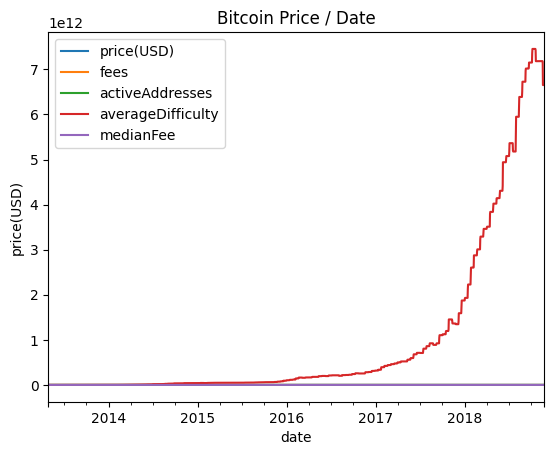

In [29]:
df.plot()
plt.xlabel('date')
plt.ylabel('price(USD)')
plt.title('Bitcoin Price / Date')
plt.show()

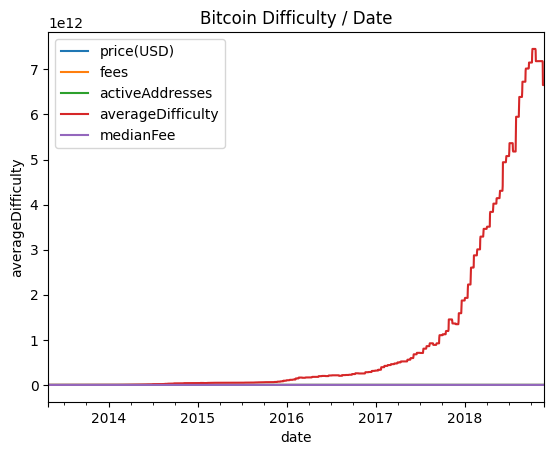

In [30]:
df.plot()
plt.xlabel('date')
plt.ylabel('averageDifficulty')
plt.title('Bitcoin Difficulty / Date')
plt.show()

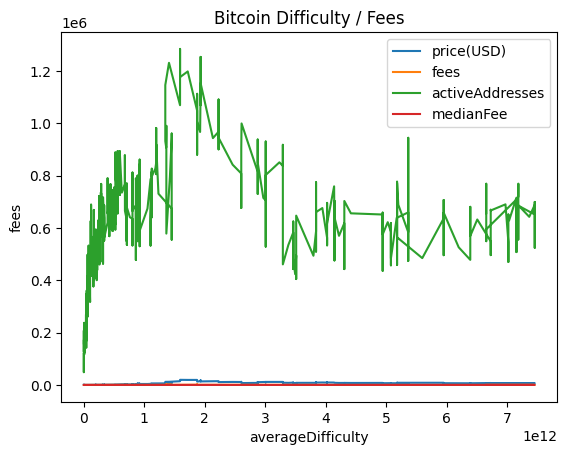

In [35]:
df.set_index('averageDifficulty', inplace=True)
df.plot()
plt.xlabel('averageDifficulty')
plt.ylabel('fees')
plt.title('Bitcoin Difficulty / Fees')
plt.show()

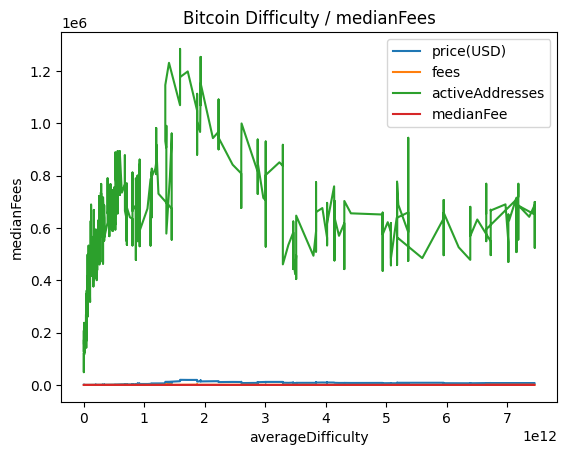

In [38]:
df.plot()
plt.xlabel('averageDifficulty')
plt.ylabel('medianFees')
plt.title('Bitcoin Difficulty / medianFees')
plt.show()

In [3]:
columns_to_keep = ['date', 'price(USD)', 'fees', 'activeAddresses', 'averageDifficulty', 'medianFee']
bitcoin_df_filtered = df[columns_to_keep]
print(bitcoin_df_filtered.head())

NameError: name 'df' is not defined

NameError: name 'bitcoin_df_filtered' is not defined